In [8]:
from src import DataLoader
from src import Backtester
from src.strategies import (
    BuyAndHoldStrategy,
    TrendFollowingStrategy,
    MeanReversionStrategy,
    MomentumStrategy,
    XGBoostStrategy,
    CppStrategy
)
import pandas as pd

In [9]:
loader = DataLoader()
df = loader.load_data("JPM")

if df.empty:
    raise ValueError("No data loaded. Exiting.")
df.head()

--- Loading Data... ---
--- Data is loaded ---


,Open,High,Low,Close,Volume
Date,,,,,
1980-03-17 00:00:00+00:00,1.039059,1.062064,1.039059,1.042893,62775
1980-03-18 00:00:00+00:00,1.042893,1.058230,1.042893,1.050562,64125
1980-03-19 00:00:00+00:00,1.058229,1.069732,1.058229,1.065898,40500
1980-03-20 00:00:00+00:00,1.065898,1.065898,1.054396,1.058230,18900
1980-03-21 00:00:00+00:00,1.058230,1.081235,1.058230,1.081235,97200


In [10]:
strategies = [
    BuyAndHoldStrategy(),
    TrendFollowingStrategy(short_window=20, long_window=50),
    MeanReversionStrategy(short_window=20, long_window=50),
    MomentumStrategy(),
    XGBoostStrategy(),
    CppStrategy(rsi_window=14, ma_window=50, vol_window=20)
]
backtester = Backtester(
    df=df,
    strategies=strategies,
    initial_capital=10000.0,
    fee=0.001,
)
backtester.run()
metrics = backtester.get_metrics()
metrics_df = pd.DataFrame.from_dict(metrics, orient="index")
metrics_df

--- BackTester running ---
--- Running Strategy 1/6: BuyAndHoldStrategy ---
Buy And Hold Strategy
--- Creating Strategy Features ---
--- Strategy Features Created ---
--- Creating Strategy Signals ---
--- Strategy Signals Created ---
[Timestamp('1980-03-18 00:00:00+0000', tz='UTC')]
--- Strategy 1 completed ---
--- Running Strategy 2/6: TrendFollowingStrategy ---
Trend Following Strategy
--- Creating Strategy Features ---
--- Strategy Features Created ---
--- Creating Strategy Signals ---
--- Strategy Signals Created ---
[Timestamp('1980-03-18 00:00:00+0000', tz='UTC'), Timestamp('1980-05-28 00:00:00+0000', tz='UTC')]
--- Strategy 2 completed ---
--- Running Strategy 3/6: MeanReversionStrategy ---
Mean Reversion Strategy (short_window=20, long_window=50)
--- Creating Strategy Features ---
--- Strategy Features Created ---
--- Creating Strategy Signals ---
--- Strategy Signals Created ---
[Timestamp('1980-03-18 00:00:00+0000', tz='UTC'), Timestamp('1980-05-28 00:00:00+0000', tz='UTC'), 

,Total Return,Annualized Return,Annualized Volatility,Max Drawdown,Sharpe Ratio
BuyAndHoldStrategy,461.63%,20.82%,33.39%,-43.63%,0.62
TrendFollowingStrategy,48.74%,4.45%,33.43%,-45.90%,0.13
MeanReversionStrategy,-75.05%,-14.12%,31.60%,-76.59%,-0.45
MomentumStrategy,-46.87%,-6.70%,30.97%,-65.47%,-0.22
XGBoostStrategy,-92.71%,-24.95%,33.38%,-93.45%,-0.75
CppStrategy,-25.92%,-3.24%,13.87%,-37.94%,-0.23


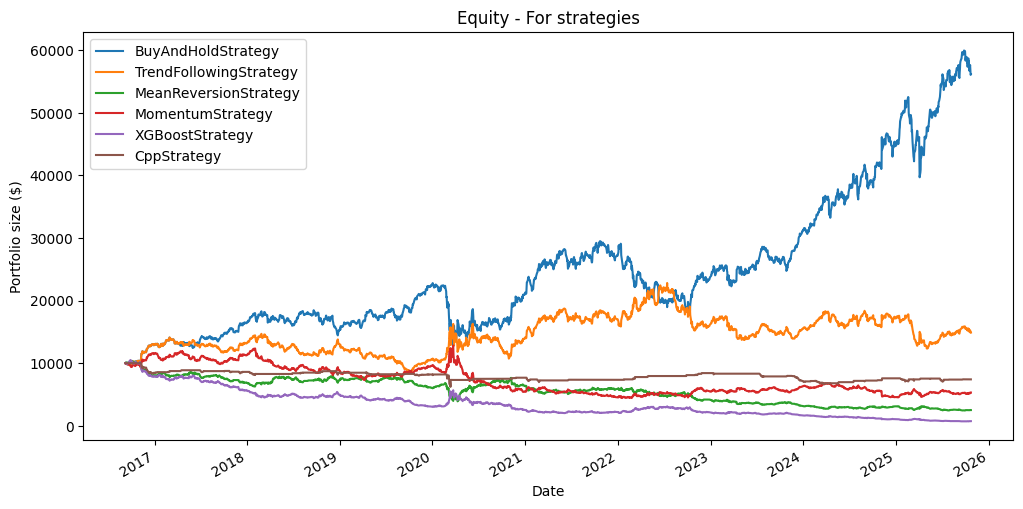

In [11]:
backtester.plot_equity()